In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import copy

In [3]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
            
            
            
        
        self.n_layers = n_layers
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        
        pass

    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return X * (X>=0)

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1*(X>=0)

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1/(1+np.exp(-X))

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return self.sigmoid(X) *(1-self.sigmoid (X))

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return X

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.ones(X.shape)

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return np.tanh(X)

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return 1-self.tanh(X)*self.tanh(X)

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        exp = np.exp(X)
        return exp/(np.sum(exp,axis = 1, keepdims = True))

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        return None
    
    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer

        """

        weight = np.zeros(shape)
        return weight

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.rand(shape[0], shape[1])
        return weight

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight = np.random.normal(size = shape)*0.01
        return weight

    def fit(self, X, y, x_test = None, y_test = None):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        Returns
        -------
        self : an instance of self
        """

        # fit function has to return an instance of itself or else it won't work with test.py
        
        
        y = self.expand_labels(y)
        
        m , n_0 = X.shape
        n_l = y.shape[1]

        parameters = self.initialization()
        self.parameters = parameters

        train_loss_history = []
        train_accuracy_history = []
        test_loss_history = []
        test_accuracy_history = []

        

        for epoch in tqdm(range(self.num_epochs), desc = "Progress Total : ", position = 0, leave = True):


            n_batches = m//self.batch_size
            X_batches = [X[self.batch_size*i:self.batch_size*(i+1),:] for i in range(0,n_batches)]
            y_batches = [y[self.batch_size*i:self.batch_size*(i+1),:] for i in range(0,n_batches)]

            train_batch_loss = []
            test_batch_loss = []
            train_batch_accuracy = []
            test_batch_accuracy = []

            for curr_x, curr_y in tqdm(zip(X_batches,y_batches), desc = "Progress Epoch: " + str(epoch+1) + "/" + str(self.num_epochs), position = 0, leave = True, total = len(X_batches)):
                A, activations, preactivations = self.forward_prop(curr_x,parameters)

                train_cost = self.cross_entropy_loss(A,curr_y)
                train_batch_loss.append(train_cost)
#                 print(A)
                self.backward_prop(curr_x,curr_y,preactivations, activations )
#                 train_batch_accuracy.append(self.score(curr_x,np.argmax(curr_y,axis = 1)))
                if(x_test is not None):
                    proba = self.predict_proba(x_test)
#                     print(proba.shape)
                    test_loss = self.cross_entropy_loss(proba, self.expand_labels(y_test))
                    test_batch_loss.append(test_loss)
#                     test_batch_accuracy.append(self.score(x_test, y_test))
                    
#             print("Training Accuracy : ", np.array(train_batch_accuracy).mean())
#             print("Validation Accuracy : ", np.array(test_batch_accuracy).mean())
            print("Validation loss : " ,np.array(test_batch_loss).mean())
            print("Training Loss : ", np.array(train_batch_loss).mean())
            


            train_loss_history.append( np.array(train_batch_loss).mean())
#             train_accuracy_history.append( np.array(train_batch_accuracy).mean())
            test_loss_history.append( np.array(test_batch_loss).mean())
#             test_accuracy_history.append(  np.array(test_batch_accuracy).mean())
                
                
        
        self.train_loss_history = train_loss_history
        self.train_accuracy_history = train_accuracy_history
        self.test_loss_history = test_loss_history
        self.test_accuracy_history = test_accuracy_history
        
        
        self.parameters = parameters


        return self
    
    
    def initialization(self):
        parameters = {}
        layers = self.layer_sizes
        
        for i in range(0,len(layers)-1):
            if(self.weight_init == 'zero'):
                curr_layer = self.zero_init((layers[i],layers[i+1]))

            elif(self.weight_init == 'random'):
                curr_layer = self.random_init((layers[i],layers[i+1]))

            else:
                curr_layer = self.normal_init((layers[i],layers[i+1]))

            parameters["W" + str(i+1)] = curr_layer
            parameters["b" + str(i+1)] = np.zeros((1,layers[i+1]))

        self.parameters = parameters

        return parameters
        
    
    def forward_prop(self,X,parameters):

        """
        Implements one forward propagation of the deep neural network.

        Parameters 
        ----------
        X : Training set to be forward propagated
        parameters : model parameters 

        Returns
        -------
        A_l : Activations of the final layer
        forward_cache : list contraining all the linear_cache and activation_cache of all the layers

        """

        A = X
        L = len(parameters)//2

        activations = {}
        preactivations = {}

        for i in range(0,L-1):
            A_prev = A
#             print(A_prev.shape)
            
            Z = np.dot(A_prev, parameters["W" + str(i+1)]) + parameters["b" + str(i+1)]

            if(self.activation == "relu"):
                A = self.relu(Z)

            elif (self.activation == "tanh"):
                A = self.tanh(Z)

            elif (self.activation == "linear"):
                A = self.linear(Z)

            elif (self.activation == "sigmoid"):
                A = self.sigmoid(Z)

            preactivations["Z" + str(i+1)] = Z
            activations["A" + str(i+1)] = A           
            A_prev = A
        
        
        Z_l = np.dot(A_prev, parameters["W" + str(L)]) + parameters["b" + str(L)]        
        A_l = self.softmax(Z_l)
        preactivations["Z" + str(L)] = Z_l
        activations["A" + str(L)] = A_l

        return A_l, activations, preactivations
    
        
    def backward_prop(self, X, Y, preactivations, activations):
        
        """
        Implements backward propagation of the complete model.

        Parameters
        ----------
        y : The ground truth labels of the curr training set
        A_l : activations of the final layer of the model
        cache : tuple containing the linear_cache and activation_cache

        Returns
        -------
        gradients : Dictionary containing the gradient vectors for each layer of the model

        """

        derivatives = {}
        L = len(activations)
        activations["A0"] = X

        A = activations["A" + str(L)]
        dZ = A - Y

        dW = np.dot(activations["A" + str(L-1) ].T, dZ)/len(X)
        db = np.sum(dZ, axis=0, keepdims=True) / len(X)

        dAPrev = np.dot(dZ, self.parameters["W" + str(L)].T)

        derivatives["dW" + str(L)] = dW
        derivatives["db" + str(L)] = db

        for l in range(L - 1, 0, -1):
            if(self.activation == "relu"):
                dact = self.relu_grad(preactivations["Z" + str(l)])

            elif (self.activation == "tanh"):
                dact = self.tanh_grad(preactivations["Z" + str(l)])

            elif (self.activation == "linear"):
                dact = self.linear_grad(preactivations["Z" + str(l)])

            elif (self.activation == "sigmoid"):
                dact = self.sigmoid_grad(preactivations["Z" + str(l)])

            dZ = dAPrev * dact
            dW = (1/len(X)) * np.dot(activations["A" + str(l - 1)].T, dZ)
            db = (1/len(X)) * np.sum(dZ, axis=0, keepdims=True)
            if l > 1:
                dAPrev = np.dot(dZ,self.parameters["W" + str(l)].T)

            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db


        for i in range(0,L):
            self.parameters["W" + str(i+1)] = self.parameters["W" + str(i+1)] - self.learning_rate*derivatives["dW" + str(i+1)]
            self.parameters["b" + str(i+1)] = self.parameters["b" + str(i+1)] - self.learning_rate*derivatives["db" + str(i+1)]
        return 
    
    

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the 
            class wise prediction probabilities.
        """

        # return the numpy array y which contains the predicted values
        proba,_,k = self.forward_prop(X,self.parameters)
        return proba

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """

        # return the numpy array y which contains the predicted values
        proba = self.predict_proba(X)
#         print(proba.shape)
        y_pred = np.argmax(proba, axis = 1)
        return y_pred

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """

        # return the numpy array y which contains the predicted values
        y_pred = self.predict(X)
        acc = (y_pred == y)
        return acc.sum()/len(y)
    
    
    def cross_entropy_loss(self, A, y):
        n = len(y)
        logp = - np.log(A[np.arange(n), y.argmax(axis=1)])
        loss = np.sum(logp)/n
        return loss
    
    
    def expand_labels(self, y):
        m = len(y)
        c = np.max(y)
        new_y = np.zeros((m,c+1))
        for i in range(m):
            l = y[i]
            new_y[i,l] = 1

        return new_y

In [4]:
train_df = pd.read_csv('dataset/mnist/mnist_train.csv')
test_df = pd.read_csv('dataset/mnist/mnist_test.csv')

In [5]:
dataset = train_df.to_numpy()
testset = test_df.to_numpy()

In [6]:
from sklearn.preprocessing import StandardScaler
X_train = dataset[:, 1:]/255
X_test = testset[:, 1:]/255
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_test)

In [7]:
y_train = dataset[:, 0]
y_test = testset[:, 0]

sigmoid , 0.1, normal , 100

In [10]:
nn = MyNeuralNetwork(5, [784, 256, 128, 64, 10], 'sigmoid', 0.1, 'random', len(X_train)//20, 100)

In [11]:
nn.fit(X_train, y_train, X_test, y_test)

Progress Epoch: 1/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.84it/s]


Validation loss :  2.4573240993048175
Training Loss :  2.5715989242456807


Progress Epoch: 2/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.87it/s]


Validation loss :  2.3014263806807134
Training Loss :  2.3015158299885274


Progress Epoch: 3/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.79it/s]


Validation loss :  2.3014263805921713
Training Loss :  2.3015158305675616


Progress Epoch: 4/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.80it/s]


Validation loss :  2.3014263805921713
Training Loss :  2.3015158305675625


Progress Epoch: 5/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.80it/s]


Validation loss :  2.3014263805921713
Training Loss :  2.3015158305675625


Progress Epoch: 6/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.70it/s]


Validation loss :  2.301426380592172
Training Loss :  2.3015158305675616


Progress Epoch: 7/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.82it/s]


Validation loss :  2.3014263805921713
Training Loss :  2.301515830567562


Progress Epoch: 8/100:  40%|████████████████████████                                    | 8/20 [00:03<00:04,  2.52it/s]


KeyboardInterrupt: 

In [204]:
# import pickle
# f = open("models/sigmoid", "wb")
# pickle.dump(nn,f)
# f.close()

In [205]:
nn.score(X_test,y_test)

0.9036

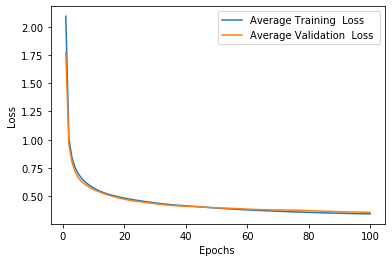

In [207]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(1,len(nn.train_loss_history) + 1, 1)],nn.train_loss_history, label = "Average Training  Loss " )
plt.plot([x for x in range(1,len(nn.test_loss_history) + 1, 1)],nn.test_loss_history, label = "Average Validation  Loss " )
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend()
plt.show()

tanh, 0.1, linear

In [8]:
nn = MyNeuralNetwork(5, [784, 256, 128, 64, 10], 'relu', 0.1, 'random', len(X_train)//20, 100)

In [9]:
nn.fit(X_train, y_train, X_test, y_test)

Progress Epoch: 1/100:   0%|                                                                    | 0/20 [00:00<?, ?it/s]C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:176: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:523: RuntimeWarning: divide by zero encountered in log
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in greater_equal
Progress Epoch: 1/100: 100%|███████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


Validation loss :  nan
Training Loss :  nan


Progress Epoch: 2/100:  60%|███████████████████████████████████▍                       | 12/20 [00:06<00:04,  1.80it/s]


KeyboardInterrupt: 

In [216]:
nn.score(X_test,y_test)

0.91

In [218]:
import pickle
f = open("models/tanh", "wb")
pickle.dump(nn,f)
f.close()

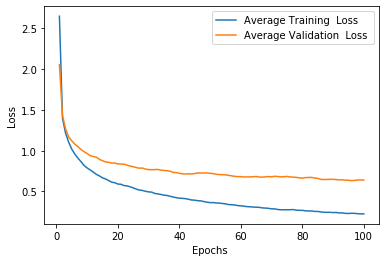

In [217]:
import matplotlib.pyplot as plt

plt.plot([x for x in range(1,len(nn.train_loss_history) + 1, 1)],nn.train_loss_history, label = "Average Training  Loss " )
plt.plot([x for x in range(1,len(nn.test_loss_history) + 1, 1)],nn.test_loss_history, label = "Average Validation  Loss " )
plt.xlabel('Epochs ')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
import pickle

Model with highest accuracy

In [14]:
relu_nn = pickle.load(open("models/relu", "rb"))

In [16]:
relu_nn.parameters

{'W1': array([[0.00123514, 0.00197044, 0.00025005, ..., 0.00824354, 0.00869153,
         0.00352182],
        [0.00909308, 0.00865799, 0.00224581, ..., 0.00573072, 0.00455763,
         0.00978907],
        [0.00644419, 0.00596275, 0.00639801, ..., 0.00368183, 0.00765543,
         0.00261152],
        ...,
        [0.00049213, 0.00306821, 0.00374583, ..., 0.00633159, 0.00406591,
         0.00922146],
        [0.00821146, 0.00413888, 0.00129525, ..., 0.00779239, 0.00082317,
         0.00500184],
        [0.00432546, 0.00446678, 0.0088842 , ..., 0.0070756 , 0.00905826,
         0.00360253]]),
 'b1': array([[-0.01136573, -0.06012103, -0.06625817, -0.09982769, -0.05657645,
          0.01823025,  0.00377825, -0.11154891, -0.0542864 , -0.02488928,
         -0.16572987, -0.01417219, -0.08996177, -0.03772061, -0.03606515,
          0.00526073, -0.06370434, -0.0974894 ,  0.02524418, -0.08400137,
         -0.00840822,  0.0088227 , -0.0157027 , -0.04337432,  0.00650432,
         -0.04667714, -0.00

In [18]:
W4 = relu_nn.parameters["W4"]

In [20]:
W4.shape

(64, 10)

In [21]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(W4)

[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.252136
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.819557
[t-SNE] KL divergence after 1000 iterations: 0.168041


In [22]:
tsne_em[:,0].shape,tsne_em[:,1].shape

((64,), (64,))

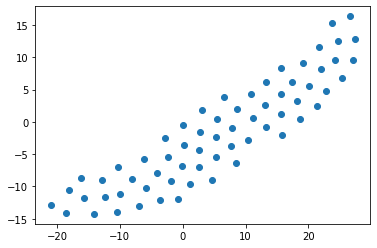

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize = (5,5))
plt.scatter(tsne_em[:,0],tsne_em[:,1])
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
# sns.scatterplot(x = df_tsne_pca_2d["x"], y = df_tsne_pca_2d["y"], hue = df_tsne_pca_2d["label"], palette = sns.color_palette("husl", 10) )
plt.show()

Sklearn imp

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(256,128,64), random_state=1, activation = 'relu')

In [33]:
clf.fit(X_train,y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(256, 128, 64), random_state=1,
              solver='lbfgs')

In [36]:
clf2 = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(256,128,64), random_state=1, activation = 'logistic')
clf2.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(256, 128, 64), random_state=1,
              solver='lbfgs')

In [37]:
clf3 = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(256,128,64), random_state=1, activation = 'tanh')
clf3.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(256, 128, 64),
              random_state=1, solver='lbfgs')

In [38]:
clf4 = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(256,128,64), random_state=1, activation = 'identity')
clf4.fit(X_train,y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', alpha=0.1,
              hidden_layer_sizes=(256, 128, 64), random_state=1,
              solver='lbfgs')

In [39]:
s1 = clf.score(X_test,y_test)
print("For Relu Activation : ", s1)

For Relu Activation :  0.9767


In [40]:
s2 = clf2.score(X_test,y_test)
print("For Sigmoid/Logistic Activation : ", s2)

For Sigmoid/Logistic Activation :  0.9644


In [41]:
s3 = clf3.score(X_test,y_test)
print("For tanh Activation : ", s3)

For tanh Activation :  0.9667


In [42]:
s4 = clf.score(X_test,y_test)
print("For Linear/Identity Activation : ", s4)

For Linear/Identity Activation :  0.9767


MYnn accuracy

In [43]:
relu_nn = pickle.load(open("models/relu", "rb"))
sigmoid_nn = pickle.load(open("models/sigmoid", "rb"))
linear_nn = pickle.load(open("models/linear2", "rb"))
tanh_nn =  pickle.load(open("models/tanh", "rb"))

In [44]:
relu_nn.score(X_test, y_test)

0.9388

In [45]:
sigmoid_nn.score(X_test, y_test)

0.9036

In [46]:
linear_nn.score(X_test, y_test)

0.8163

In [47]:
tanh_nn.score(X_test, y_test)

0.91